In [95]:
import numpy as np
import pandas as pd
import os 
from pathlib import Path
import pickle

In [96]:
BASEDIR = Path("/home/michaeldodds/Projects/manchester/computer_vision/")
FULLMODELDIR = BASEDIR / 'results' / 'fullmodel'
CVCSV = FULLMODELDIR / 'cv_fullmodel.csv'
CNNCSV = FULLMODELDIR / 'cnn_fullmodel.csv'
# Load full model results

def load_results(path):
    cv_df = pd.read_csv(path)
    cv_df = cv_df.sort_values('fullmodelaccuracy', ascending=False)
    cols = ['norm_type', 'keypoints_algo', 'descriptor_algo', 'k', 'classifier', 'dataset']
    cv_grp = cv_df.groupby(cols)

    cv_agg = cv_grp.aggregate({'fullmodelaccuracy': ['max']})
    
    return cv_df, cols, cv_grp 

cv_df, cols, cv_grp = load_results(CNNCSV)

Airplane 0.78875
Bird 0.5575
Car 0.82
Cat 0.51125
Deer 0.62375
Dog 0.59
Horse 0.65
Monkey 0.6025
Ship 0.80625
Truck 0.7025
Airplane 0.5925
Bird 0.39
Car 0.5525
Cat 0.19125
Deer 0.4125
Dog 0.1575
Horse 0.5125
Monkey 0.42
Ship 0.42375
Truck 0.5


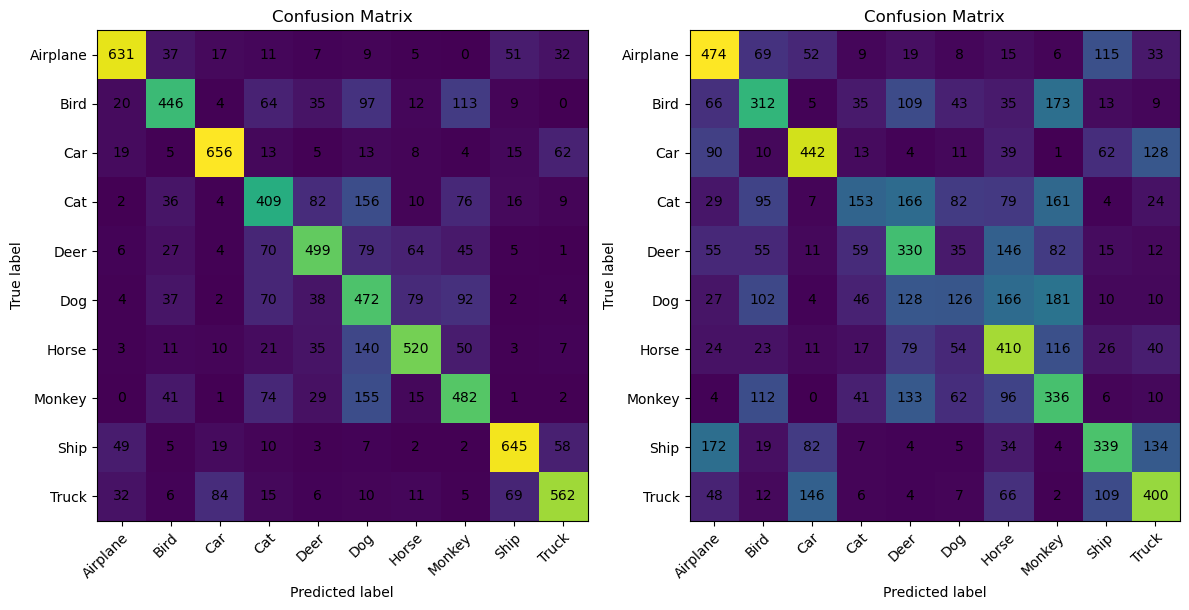

In [ ]:
BASEDIR = Path("/home/michaeldodds/Projects/manchester/computer_vision/")
FULLMODELDIR = BASEDIR / 'results' / 'fullmodel'
CVCSV = FULLMODELDIR / 'cv_fullmodel.csv'
CNNCSV = FULLMODELDIR / 'cnn_fullmodel.csv'
# Load full model results

def load_results(path):
    cv_df = pd.read_csv(path)
    cv_df = cv_df.sort_values('fullmodelaccuracy', ascending=False)

    
    return cv_df

cv = load_results(CVCSV)
cnn = load_results(CNNCSV)
# Optional: specify class names (replace with your actual labels)
path = "/home/michaeldodds/Projects/manchester/computer_vision/datasets/processed/stl10/class_index"
with open(path, 'rb') as f: 
        classes = pickle.load(f)


class_names = [f"{classes[i + 1].capitalize()}" for i in range(len(classes))]

fig, axes = plt.subplots(1, 2, figsize=(12, 24))

for i, cv_df in enumerate([cv, cnn]):
    
    cvstl10 = cv_df[cv_df['dataset'] == 'stl10'].iloc[:3]
    stl10row = cvstl10.iloc[0]

    TOPPATH = FULLMODELDIR / f'{stl10row['classifier']}_{stl10row['index']}'

    paths = list(TOPPATH.iterdir())
        # Load the confusion matrix
    cm = np.loadtxt(paths[0], delimiter=",")
    ca = np.loadtxt(paths[1], delimiter=',')


    [print(class_name, ca[2][i]) for i, class_name in enumerate(class_names)]

    import numpy as np
    import matplotlib.pyplot as plt
    ax = axes[i]
    # Create the plot
    im = ax.imshow(cm)

    # Labels and title
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    if 
    ax.set_title("Confusion Matrix")

    # Tick labels
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.setp(ax.get_xticklabels(), rotation=44, ha="right", rotation_mode="anchor")

    # Annotate each cell with its count
    for i in range(cm.shape[-1]):
        for j in range(cm.shape[0]):
            ax.text(j, i, int(cm[i, j]), ha="center", va="center")

fig.tight_layout()
plt.show()